# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\vasanth\Downloads\Housing-2-1.csv")

# Data Exploration and Preprocessing 

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Missing Values

In [4]:
df.dropna(inplace=True)

In [5]:
#convert categorical value into numerical values
df = pd.get_dummies(df, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],drop_first=True)

# Target and Input features

In [7]:
X = df[['area','bedrooms','bathrooms','stories','parking','mainroad_yes','guestroom_yes','basement_yes','hotwaterheating_yes','airconditioning_yes','prefarea_yes','furnishingstatus_semi-furnished','furnishingstatus_unfurnished']]
y = df['price']

# Data Splitting

In [9]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Linear Regression Modelling

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error:{mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error:1754318687330.66
R-squared: 0.65


# Visualization

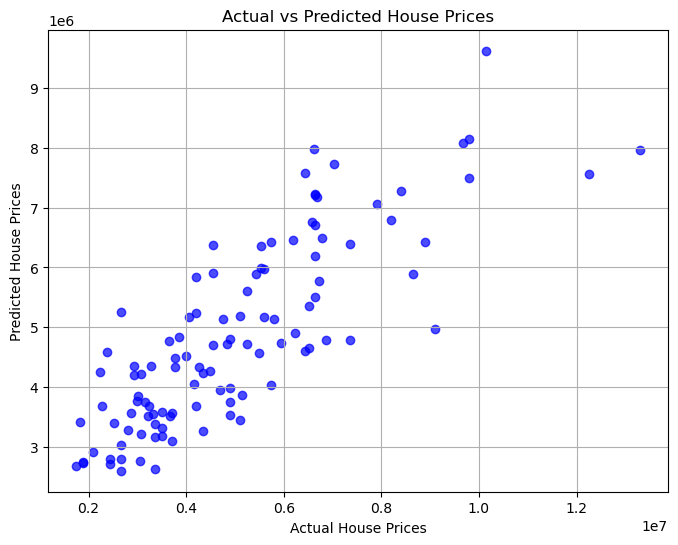

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

# Interpretation

In [14]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficient (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}:{coef:.2f}")
print(f"Intercept:{intercept:.2f}")

Coefficient (Slopes):
area:235.97
bedrooms:76778.70
bathrooms:1094444.79
stories:407476.59
parking:224841.91
mainroad_yes:367919.95
guestroom_yes:231610.04
basement_yes:390251.18
hotwaterheating_yes:684649.89
airconditioning_yes:791426.74
prefarea_yes:629890.57
furnishingstatus_semi-furnished:-126881.82
furnishingstatus_unfurnished:-413645.06
Intercept:260032.36
